# Data Profiling

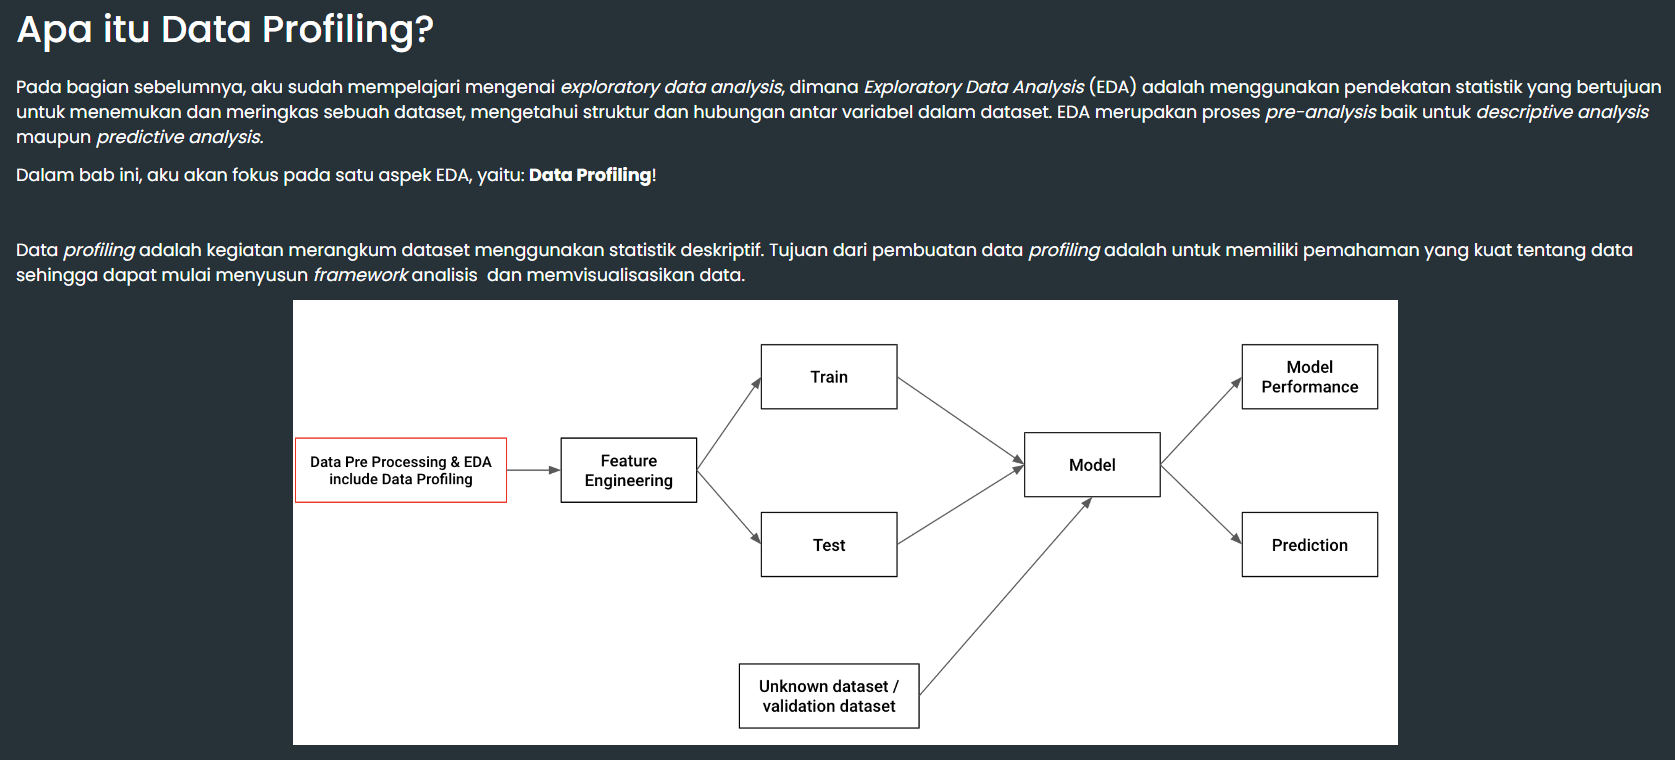

In [ ]:
import pandas as pd
import numpy as np
import io
import pandas_profiling
# IMPORT DATA
retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')

In [ ]:
# INSPEKSI TIPE DATA
retail_raw.dtypes

In [ ]:
# DESCRIPTIVE STATISTICS - PART 1

# Kolom city
length_city = len(retail_raw['city'])
print('Length kolom city:', length_city)

# Tugas Praktek: Kolom product_id
length_product_id = len(retail_raw['product_id'])
print('Length kolom product_id:', length_product_id)

In [ ]:
# DESCRIPTIVE STATISTICS - PART 2

# Count kolom city
count_city = retail_raw['city'].count()
print('Count kolom count_city:', count_city)

# Tugas praktek: count kolom product_id
count_product_id = retail_raw['product_id'].count()
print('Count kolom product_id:', count_product_id)

In [ ]:
# DESCRIPTIVE STATISTICS - PART 3

# Kolom city
length_city = len(retail_raw['city'])
count_city = retail_raw['city'].count()

# Kolom product id
length_product_id = len(retail_raw['product_id'])
count_product_id = retail_raw['product_id'].count()

# Missing value pada kolom city
number_of_missing_values_city = length_city - count_city
ratio_of_missing_values_city = number_of_missing_values_city/length_city
pct_of_missing_values_city = '{0:.1f}%'. format(ratio_of_missing_values_city*100)
print('Persentase missing value kolom city:', pct_of_missing_values_city)

# Tugas praktek: Missing value pada kolom product_id
number_of_missing_values_product_id = length_product_id - count_product_id
ratio_of_missing_values_product_id = number_of_missing_values_product_id/length_product_id
pct_of_missing_values_product_id = '{0:.1f}%'.format(ratio_of_missing_values_product_id * 100)
print('Persentase missing value kolom product_id:', pct_of_missing_values_product_id)

In [ ]:
# DESCRIPTIVE STATISTICS - PART 4

# Deskriptif statistics kolom quantity
print('Kolom quantity')
print('Minimum value: ', retail_raw['quantity'].min())
print('Maximum value: ', retail_raw['quantity'].max())
print('Mean value: ', retail_raw['quantity'].mean())
print('Mode value: ', retail_raw['quantity'].mode())
print('Median value: ', retail_raw['quantity'].median())
print('Standard Deviation value: ', retail_raw['quantity'].std())

# Tugas praktek: Deskriptif statistics kolom item_price
print('')
print('Kolom item_price')
print('Minimum value: ', retail_raw['item_price'].min())
print('Maximum value: ', retail_raw['item_price'].max())
print('Mean value: ', retail_raw['item_price'].mean())
print('Median value: ', retail_raw['item_price'].median())
print('Standard Deviation value: ', retail_raw['item_price'].std())

In [ ]:
# DESCRIPTIVE STATISTICS - PART 5

# Quantile statistics kolom quantity
print('Kolom quantity:')
print(retail_raw['quantity'].quantile([0.25, 0.5, 0.75]))

# Tugas praktek: Quantile statistics kolom item_price
print('')
print('Kolom item_price:')
print(retail_raw['item_price'].quantile([0.25, 0.5, 0.75]))

In [ ]:
# DESCRIPTIVE STATISTICS - PART 6

print('Korelasi quantity dengan item_price')
print(retail_raw[['quantity', 'item_price']].corr())

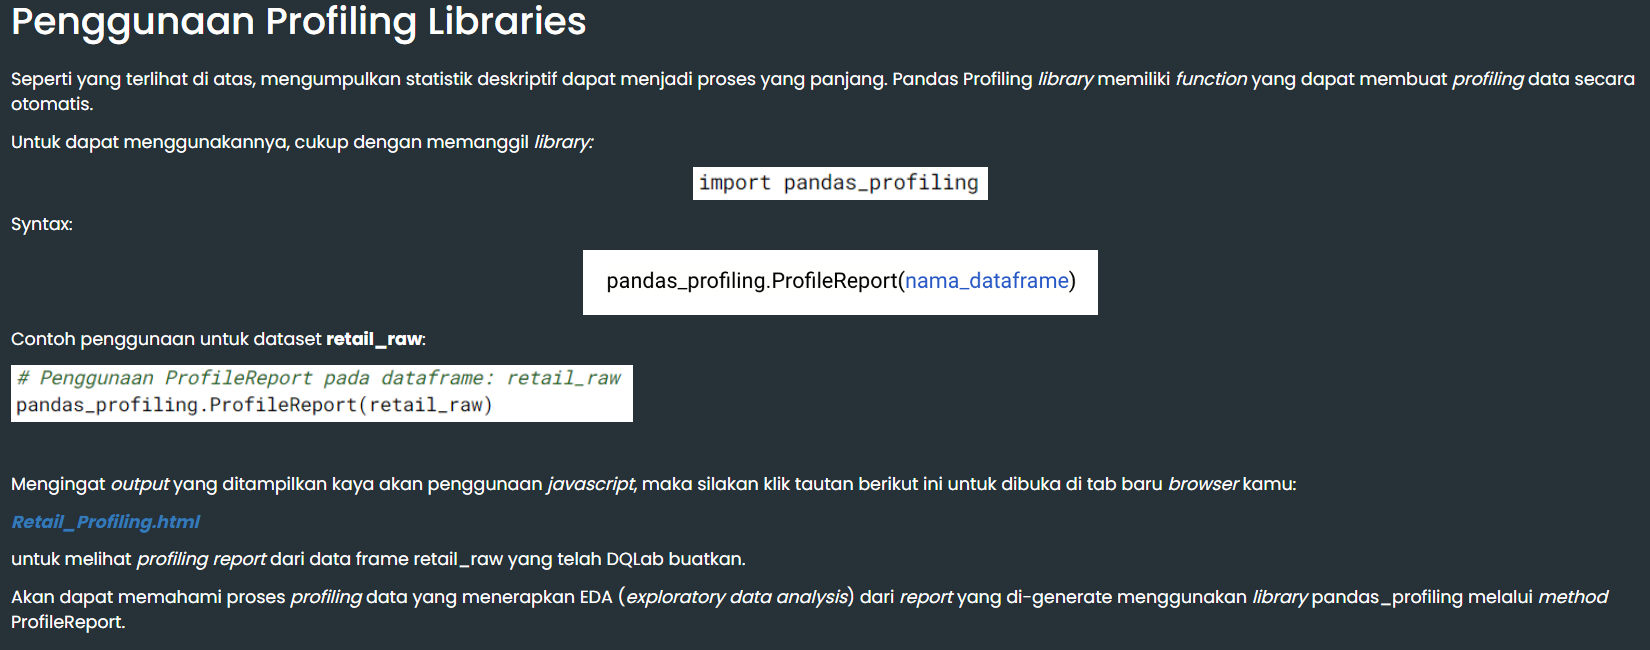

https://storage.googleapis.com/dqlab-image/html/Retail%20Profiling.html

In [ ]:
# pandas_profiling.ProfileReport(retail_raw)

# Data Cleansing

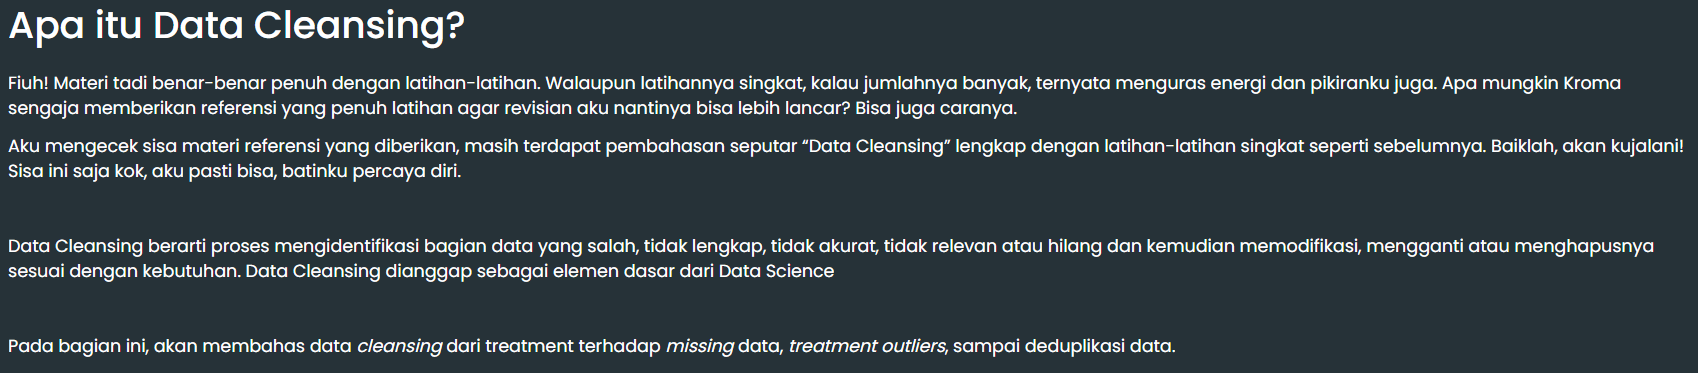

In [ ]:
# MISSING DATA

# Check kolom yang memiliki missing data
print('Check kolom yang memiliki missing data:')
print(retail_raw.isnull().any())

# Filling the missing value (imputasi)
print('\nFilling the missing value (imputasi):')
print(retail_raw['quantity'].fillna(retail_raw.quantity.mean()))

# Drop missing value
print('\nDrop missing value:')
print(retail_raw['quantity'].dropna())

In [ ]:
# TUGAS PRAKTEK

print(retail_raw['item_price'].fillna(retail_raw['item_price'].mean()))

In [ ]:
# OUTLIERS

# Q1, Q3, dan IQR
Q1 = retail_raw['quantity'].quantile(0.25)
Q3 = retail_raw['quantity'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

# Removing outliers
retail_raw = retail_raw[~((retail_raw['quantity'] < (Q1 - 1.5 * IQR)) | (retail_raw['quantity'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

In [ ]:
# TUGAS PRAKTEK

# Q1, Q3, dan IQR
Q1 = retail_raw['item_price'].quantile(0.25)
Q3 = retail_raw['item_price'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

# Removing outliers
retail_raw = retail_raw[~((retail_raw['item_price'] < (Q1 - 1.5 * IQR)) | (retail_raw['item_price'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

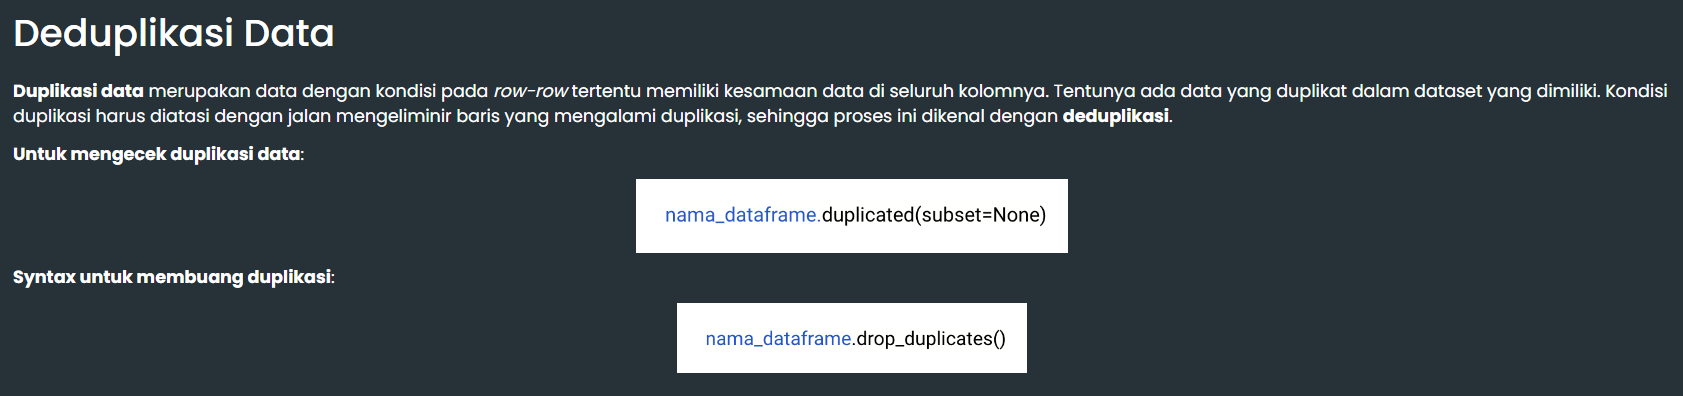

In [ ]:
# TUGAS PRAKTEK

# Check ukuran (baris dan kolom) sebelum data duplikasi dibuang
print('Shape awal: ', retail_raw.shape)

# Buang data yang terduplikasi
retail_raw.drop_duplicates(inplace=True)

# Check ukuran (baris dan kolom) setelah data duplikasi dibuang
print('Shape akhir: ', retail_raw.shape)

# Mini Project

In [ ]:
# CASE STUDY: DATA PROFILING

# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')

# inspeksi dataframe uncleaned_raw
print('Lima data teratas:') 
uncleaned_raw.head()

In [ ]:
# Check kolom yang mengandung missing value
print('\nKolom dengan missing value:') 
print(uncleaned_raw.isnull().any())

# Persentase missing value
length_qty = len(uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()

# mengurangi length dengan count
number_of_missing_values_qty = length_qty - count_qty

# mengubah ke bentuk float
float_of_missing_values_qty = float(number_of_missing_values_qty / length_qty) 

# mengubah ke dalam bentuk persen
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty*100) 

# print hasil percent dari missing value
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)

# Mengisi missing value tersebut dengan mean dari kolom tersebut
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

In [ ]:
# CASE STUDY: DATA CLEANSING - PART 1
import matplotlib.pyplot as plt

plt.style.use('default')

uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

#Mengetahui kolom yang memiliki outliers!
uncleaned_raw.boxplot()
plt.show()

In [ ]:
# CASE STUDY: DATA CLEANSING - PART 2

# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')

#Check IQR
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

#removing outliers
uncleaned_raw = uncleaned_raw[~((uncleaned_raw[['UnitPrice']] < (Q1 - 1.5 * IQR)) | (uncleaned_raw[['UnitPrice']] > (Q3 + 1.5 * IQR)))]

#check for duplication
print(uncleaned_raw.duplicated(subset=None))

#remove duplication
uncleaned_raw = uncleaned_raw.drop_duplicates()